In [3]:
import csv
import math
import numpy as np
from math import degrees, radians, pi
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.transforms as transforms
from heapq import nsmallest

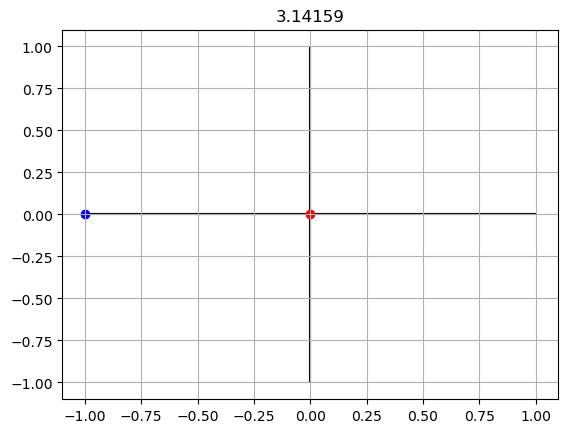

In [4]:
point1 = (0,0)
point2 = (-1,0)

dx = point2[0] - point1[0]
dy = point2[1] - point1[1]

rads = math.atan2(dy,dx)

plt.title(f"{rads:.5f}")
plt.scatter(point1[0], point1[1], c='r')
plt.scatter(point2[0], point2[1], c='b')
plt.vlines(0, -1, 1, colors='k', zorder=-1)
plt.hlines(0, -1, 1, colors='k', zorder=-1)
plt.grid()
plt.show()

In [5]:
def read_track_points(file_path):
    points = []
    with open(file_path, 'r') as f:
        csv_reader = csv.DictReader(f)
        for row in csv_reader:
            points.append((int(row['point_number']), float(row['x_coord']), float(row['y_coord'])))
    return points

def get_nearest_points_old(track_points, car_position):
    # Calculate distances from the car to all points
    distances = [(math.sqrt((x - car_position[0])**2 + (y - car_position[1])**2), (x, y)) for x, y in track_points]

    # Sort distances
    distances.sort()

    # Get the two nearest points
    nearest_point = distances[0][1]
    next_nearest_point = distances[1][1]

    # Ensure the two points are adjacent on the track
    if (track_points.index(nearest_point) - track_points.index(next_nearest_point)) not in (-1, 1):
        next_nearest_point = distances[2][1]

    return nearest_point, next_nearest_point

def get_line_direction(point1, point2):
    delta_x = point2[0] - point1[0]
    delta_y = point2[1] - point1[1]
    return math.atan2(delta_y, delta_x)

def direction_in_radians(point1, point2):
    # Check for vertical line
    # Unpack the coordinates
    order1, x1, y1 = point1
    order2, x2, y2 = point2

    # Calculate the differences
    dx = x2 - x1
    dy = y2 - y1

    # Calculate the direction in radians
    direction = math.atan2(dy, dx)
    
    return direction

def get_nearest_points(track_points, position, n=2):
    nearest_points = nsmallest(n, track_points, key=lambda track_point: math.hypot(position[0]-track_point[1], position[1]-track_point[2]))

    point1, point2 = nearest_points
    if point1[0] > point2[0]:
        next_point = point1
        prev_point = point2
    else:
        next_point = point2
        prev_point = point1

    return prev_point, next_point

In [6]:
def rad_between_lines(car_heading, A, B):
    # Convert line representations to vectors
    V1 = (math.cos(car_heading), math.sin(car_heading))
    V2 = (B[0] - A[0], B[1] - A[1])

    # Calculate dot product
    dot_product = V1[0]*V2[0] + V1[1]*V2[1]

    # Calculate magnitudes
    magnitude_V1 = math.sqrt(V1[0]**2 + V1[1]**2)
    magnitude_V2 = math.sqrt(V2[0]**2 + V2[1]**2)

    # Calculate and return angle in degrees
    cos_alpha = dot_product / (magnitude_V1 * magnitude_V2)
    alpha_rad = math.acos(cos_alpha)
    # alpha_deg = alpha_rad * 180 / math.pi
    return alpha_rad

In [7]:
# Example usage:
track_points = [(1, 0, 0), (2, 1, 0), (3, 2, 0), (3, 2, 1), (4, 2, 2), (5, 1, 2), (6, 0, 2), (7, 0, 1)]  # Your track points here
car_position = (1.5, 0.5)  # Your car's position here
car_heading = math.pi / 2  # Your car's heading here (in radians)

point1, point2 = get_nearest_points(track_points, car_position)
line_direction = get_line_direction(point1, point2)

# Adjust heading and line direction to the same range (0 to 2*pi)
car_heading %= 2*math.pi
line_direction %= 2*math.pi

if abs(car_heading - line_direction) < 0.01:  # Replace 0.01 with your acceptable error margin
    print("The car is going in the right direction.")
elif abs(car_heading - (line_direction + math.pi)%(2*math.pi)) < 0.01:
    print("The car is going in the wrong direction.")
else:
    print("The car's direction is unclear.")

The car's direction is unclear.


In [8]:
track_points

[(1, 0, 0),
 (2, 1, 0),
 (3, 2, 0),
 (3, 2, 1),
 (4, 2, 2),
 (5, 1, 2),
 (6, 0, 2),
 (7, 0, 1)]

In [9]:
# Create a list to hold the points
track_points = []

num_of_points = 25

# Calculate the angle between each point
angle_increment = 2 * math.pi / num_of_points

# Generate the points
for i in range(num_of_points):
    angle = i * angle_increment
    x = math.cos(angle)
    y = math.sin(angle)
    track_points.append((x, y))

In [10]:
track_points = read_track_points("test_track_coords.csv")

In [11]:
# Extract x and y coordinates for plotting
x_coords = [track_point[1] for track_point in track_points]
y_coords = [track_point[2] for track_point in track_points]

In [12]:
nearest_points = get_nearest_points(track_points, car_position)

# Determine which point is the next point and which is the previous point
if point1[0] > point2[0]:
    next_point = point1
    prev_point = point2
else:
    next_point = point2
    prev_point = point1

In [13]:
track_rad = direction_in_radians((0,0), (0,-1))
track_rad

ValueError: not enough values to unpack (expected 3, got 2)

In [ ]:
track_points[:5]

[(1, 0.0, 1.0),
 (2, 0.2486898871648548, 0.9685831611286311),
 (3, 0.4817536741017153, 0.8763066800438636),
 (4, 0.6845471059286887, 0.7289686274214116),
 (5, 0.8443279255020151, 0.5358267949789965)]

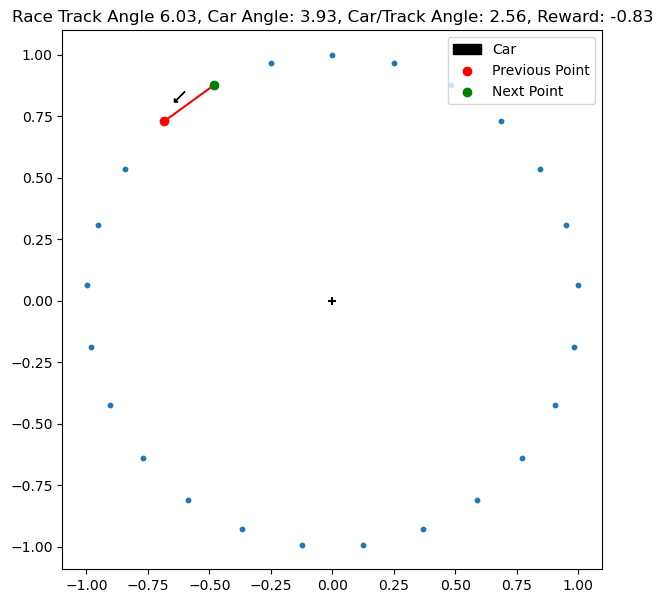

In [ ]:
car_coords = (-0.6, 0.85)
car_heading = math.pi * 5/4

arrow_length = 0.05
arrow_end = (car_coords[0] + arrow_length * math.cos(car_heading), 
             car_coords[1] + arrow_length * math.sin(car_heading))

point1, point2 = get_nearest_points(track_points, car_coords)
track_rad = direction_in_radians(point1, point2)
line_direction = get_line_direction(point1, point2)
rad = rad_between_lines(car_heading, point1, point2)
reward = 1*math.cos(rad_between_lines(car_heading, point1, point2))

# Plot the points
plt.figure(figsize=(7,7))

plt.arrow(car_coords[0], car_coords[1], arrow_end[0] - car_coords[0], arrow_end[1] - car_coords[1],
          head_width=0.02, head_length=0.01, fc='k', ec='k', label='Car')
plt.scatter(point1[1], point1[2], c='red', zorder=10, label='Previous Point')
plt.scatter(point2[1], point2[2], c='green', zorder=10, label='Next Point')
plt.plot([point1[1], point2[1]], [point1[2], point2[2]], c='red')
plt.scatter(x_coords, y_coords, s=10)
plt.scatter(0, 0, marker='+', c='black')
plt.gca().set_aspect('equal', adjustable='box')
plt.title(f'Race Track Angle {angle:.2f}, Car Angle: {car_heading:.2f}, Car/Track Angle: {rad:.2f}, Reward: {reward:.2f}')
plt.legend()
plt.show()

***

In [38]:
import pandas as pd
track = pd.read_excel("../data/nord_20230803_155424.xlsx")

In [39]:
track.head()

,timestamps,x_coords,y_coords,z_coords,gears,speeds,headings,normalizedCarPositions,wheels_off_track,off_track,fl_wheel_slip,fr_wheel_slip,rl_wheel_slip,rr_wheel_slip,fl_suspension_travel,fr_suspension_travel,rl_suspension_travel,rr_suspension_travel
0,2023-08-03 21:36:04.482,-517.279968,-2350.988770,139.831558,2,62.427006,2.212538,0.000044,0,0,0.089722,0.046129,0.107342,0.116815,0.075640,0.075494,0.097220,0.094205
1,2023-08-03 21:36:04.583,-518.695984,-2349.923828,139.894226,2,62.750980,2.216559,0.000130,0,0,0.087758,0.044093,0.109154,0.116993,0.076574,0.076001,0.096165,0.093701
2,2023-08-03 21:36:04.683,-520.073364,-2348.879150,139.953354,2,63.073586,2.220555,0.000213,0,0,0.101292,0.023678,0.103614,0.115390,0.076862,0.076198,0.096911,0.094846
3,2023-08-03 21:36:04.784,-521.451172,-2347.821289,140.015198,2,63.373398,2.227915,0.000297,0,0,0.129124,0.007892,0.121701,0.089500,0.077432,0.076167,0.097823,0.094973
4,2023-08-03 21:36:04.885,-522.865173,-2346.711426,140.080292,2,63.632893,2.239854,0.000391,0,0,0.108834,0.014902,0.133145,0.088014,0.077808,0.075483,0.097861,0.094219


In [40]:
print(f"{track.memory_usage(deep=True).sum() / 1024 / 1024:.2f} MB")

1.65 MB


In [41]:
nord_df = track[['x_coords', 'y_coords', 'headings','normalizedCarPositions']]

In [42]:
nord_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12007 entries, 0 to 12006
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   x_coords                12007 non-null  float64
 1   y_coords                12007 non-null  float64
 2   headings                12007 non-null  float64
 3   normalizedCarPositions  12007 non-null  float64
dtypes: float64(4)
memory usage: 375.3 KB


In [44]:
x_coords = nord_df['x_coords'].values
y_coords = nord_df['y_coords'].values
headings = nord_df['headings'].values

x_coords = x_coords[::8]
y_coords = y_coords[::8]
headings = headings[::8]

In [20]:
len(x_coords)

1501

In [21]:
track_points = []
for i in range(len(x_coords)):
    track_points.append((i, x_coords[i], y_coords[i]))

In [22]:
# x_coords = [track_point[1] for track_point in track_points]
# y_coords = [track_point[2] for track_point in track_points]

In [23]:
track_points[-10:]

[(1491, -403.7486572265625, -2326.853271484375),
 (1492, -416.89013671875, -2330.8876953125),
 (1493, -428.5875549316406, -2336.683837890625),
 (1494, -439.6908569335938, -2343.3173828125),
 (1495, -450.1741333007812, -2350.968994140625),
 (1496, -460.3565979003906, -2358.187255859375),
 (1497, -471.0848388671875, -2363.283203125),
 (1498, -482.5844116210938, -2364.64990234375),
 (1499, -493.9543151855469, -2363.67431640625),
 (1500, -506.4581604003906, -2358.333740234375)]

In [24]:
car_coords = (2150, 1650)
car_heading = math.pi * 5/4

arrow_length = 0.05
arrow_end = (car_coords[0] + arrow_length * math.cos(car_heading), 
             car_coords[1] + arrow_length * math.sin(car_heading))

point1, point2 = get_nearest_points(track_points, car_coords)
track_rad = direction_in_radians(point1, point2)
line_direction = get_line_direction(point1, point2)
rad = rad_between_lines(car_heading, point1, point2)
reward = 1*math.cos(rad_between_lines(car_heading, point1, point2))

# plt.arrow(car_coords[0], car_coords[1], arrow_end[0] - car_coords[0], arrow_end[1] - car_coords[1],
#           head_width=0.02, head_length=0.01, fc='k', ec='k', label='Car')

In [25]:
def get_line_direction_degrees(point1, point2):
    dx, dy = point2[0] - point1[0], point2[1] - point1[1]
    return math.degrees(math.atan2(dy, dx))

def get_difference_in_degrees(car_heading_rad, point1, point2):
    # Convert car heading from radians to degrees
    car_heading_deg = math.degrees(car_heading_rad)

    # Get the direction of the road in degrees
    road_direction_deg = get_line_direction_degrees(point1, point2)

    # Calculate the difference in degrees
    difference = road_direction_deg - car_heading_deg

    # Normalize the difference to the range [-180, 180]
    difference = (difference + 180) % 360 - 180

    return difference

In [26]:
cars = [(2150,1650,pi/4),
        (2250,1650,0),
        (2150,1450,pi/4),
        (2070,1345,7*pi/4),
        (2335,1475,pi/6),]

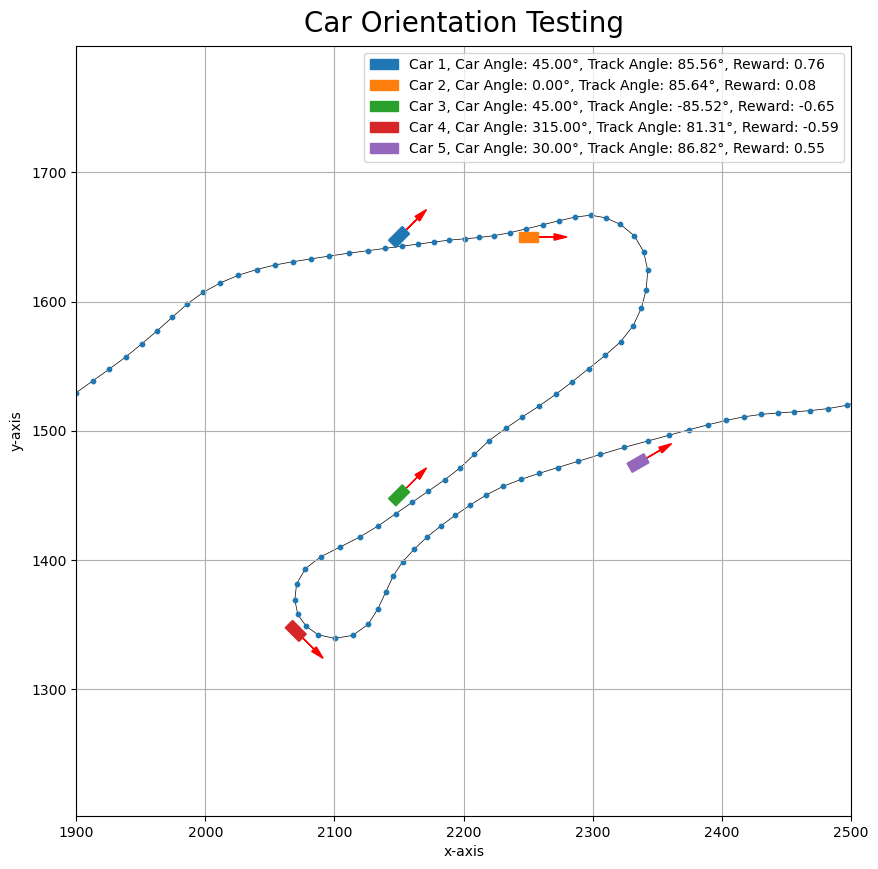

In [27]:
car_length, car_width = 15, 8
arrow_length = 20
reward = 0.0

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title("Car Orientation Testing", fontsize=20, pad=10)

for i, car in enumerate(cars):
    car_coords = (car[0], car[1])
    car_heading = car[2]

    point1, point2 = get_nearest_points(track_points, car_coords)
    # track_direction = get_line_direction(point1, point2)
    theta = get_difference_in_degrees(car_heading, point1, point2)
    reward = np.round(np.cos(radians(theta)),2)

    road_direction_deg = get_line_direction_degrees(point1, point2)
    # rad = rad_between_lines(car_heading, point1, point2)
    # reward = 1*math.cos(rad_between_lines(car_heading, point1, point2))

    plt.scatter(point1[0], point1[1], c='red', zorder=10)
    plt.scatter(point2[0], point2[1], c='green', zorder=10)
    plt.plot([point1[0], point2[0]], [point1[1], point2[1]], c='red')
    
    color = plt.cm.tab10(i)
    arrow_end = (car_coords[0] + arrow_length * math.cos(car_heading), car_coords[1] + arrow_length * math.sin(car_heading))
    rect = patches.Rectangle((- car_length/2, - car_width/2), car_length, car_width, color=color, label=f'Car {i+1}, Car Angle: {degrees(car_heading):.2f}°, Track Angle: {road_direction_deg:.2f}°, Reward: {reward:.2f}', zorder=3)
    rot_trans = transforms.Affine2D().rotate_deg(degrees(car_heading)).translate(car_coords[0], car_coords[1])
    rect.set_transform(rot_trans + ax.transData)
    ax.add_patch(rect)
    ax.arrow(car_coords[0], car_coords[1], arrow_end[0] - car_coords[0], arrow_end[1] - car_coords[1],
            head_width=5, head_length=10, fc='red', ec='red')

ax.scatter(x_coords, y_coords, s=10, zorder=1)
ax.plot(x_coords, y_coords, linewidth=0.5, color='black', zorder=0)

plt.xlabel("x-axis")
plt.ylabel("y-axis", labelpad=5)
plt.axis('equal')
plt.grid()
plt.legend()
# zoom in start/finish line
# plt.xlim(-1000, 0)
# plt.ylim(-2500, -2000)

# zoom in on carousel
plt.xlim(1900, 2500)
plt.ylim(1400, 1600)
plt.show()

***

Nearest points: (-1206.242553710938, 2121.29345703125), (-1192.75, 2118.27587890625)

In [45]:
nord_df.head()

,x_coords,y_coords,headings,normalizedCarPositions
0,-517.279968,-2350.988770,2.212538,0.000044
1,-518.695984,-2349.923828,2.216559,0.000130
2,-520.073364,-2348.879150,2.220555,0.000213
3,-521.451172,-2347.821289,2.227915,0.000297
4,-522.865173,-2346.711426,2.239854,0.000391


In [ ]:
cmap = plt.colormaps["coolwarm"]
    ax.set_title("Nordschleife Circuit", fontsize=20, pad=10, fontweight='bold')
    sc = ax.scatter(x_coords, y_coords, c=norm_speeds, cmap=cmap, s=1)
    ax.set_xlabel("x")
    ax.set_ylabel("y", rotation=0)
    cbar = fig.colorbar(sc, label="Speed")

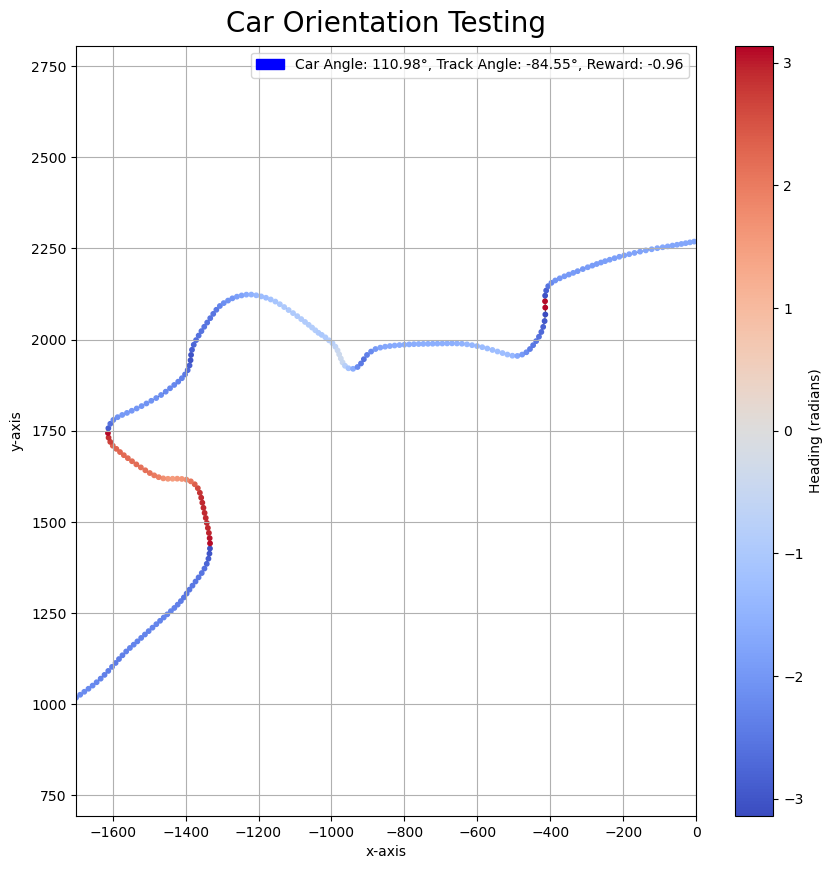

In [56]:
car_length, car_width = 15, 8
arrow_length = 20
reward = 0.0
zoom = 150

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title("Car Orientation Testing", fontsize=20, pad=10)


car_coords = (-673.22,-2186.35)
car_heading = 1.9369

point1, point2 = get_nearest_points(track_points, car_coords)

# track_direction = get_line_direction(point1, point2)
theta = get_difference_in_degrees(car_heading, point1, point2)
reward = np.round(np.cos(radians(theta)),2)

road_direction_deg = get_line_direction_degrees(point1, point2)
# rad = rad_between_lines(car_heading, point1, point2)
# reward = 1*math.cos(rad_between_lines(car_heading, point1, point2))

plt.scatter(point1[0], point1[1], c='red', zorder=10)
plt.scatter(point2[0], point2[1], c='green', zorder=10)
plt.plot([point1[0], point2[0]], [point1[1], point2[1]], c='red')

arrow_end = (car_coords[0] + arrow_length * math.cos(car_heading), car_coords[1] + arrow_length * math.sin(car_heading))
rect = patches.Rectangle((- car_length/2, - car_width/2), car_length, car_width, color='blue', label=f'Car Angle: {degrees(car_heading):.2f}°, Track Angle: {road_direction_deg:.2f}°, Reward: {reward:.2f}', zorder=3)
rot_trans = transforms.Affine2D().rotate_deg(degrees(car_heading)).translate(car_coords[0], car_coords[1])
rect.set_transform(rot_trans + ax.transData)
ax.add_patch(rect)
ax.arrow(car_coords[0], car_coords[1], arrow_end[0] - car_coords[0], arrow_end[1] - car_coords[1],
        head_width=5, head_length=10, fc='red', ec='red')

cmap = plt.colormaps["coolwarm"]
sc = ax.scatter(x_coords, y_coords, c=headings, cmap=cmap, s=10, zorder=1)
ax.plot(x_coords, y_coords, linewidth=0.5, color='black', zorder=0)
cbar = fig.colorbar(sc, label="Heading (radians)")

plt.xlabel("x-axis")
plt.ylabel("y-axis", labelpad=5)
plt.axis('equal')
plt.grid()
plt.legend()

# zoom in start/finish line
# plt.xlim(-1000, 0)
# plt.ylim(-2500, -2000)

# zoom in on carousel
# plt.xlim(1900, 2500)
# plt.ylim(1400, 1600)

# zoom in on current car location
# plt.xlim(car_coords[0]-zoom, car_coords[0]+zoom)
# plt.ylim(car_coords[1]-zoom, car_coords[1]+zoom)

plt.xlim(-1700, 0)
plt.ylim(1000, 2500)

plt.show()

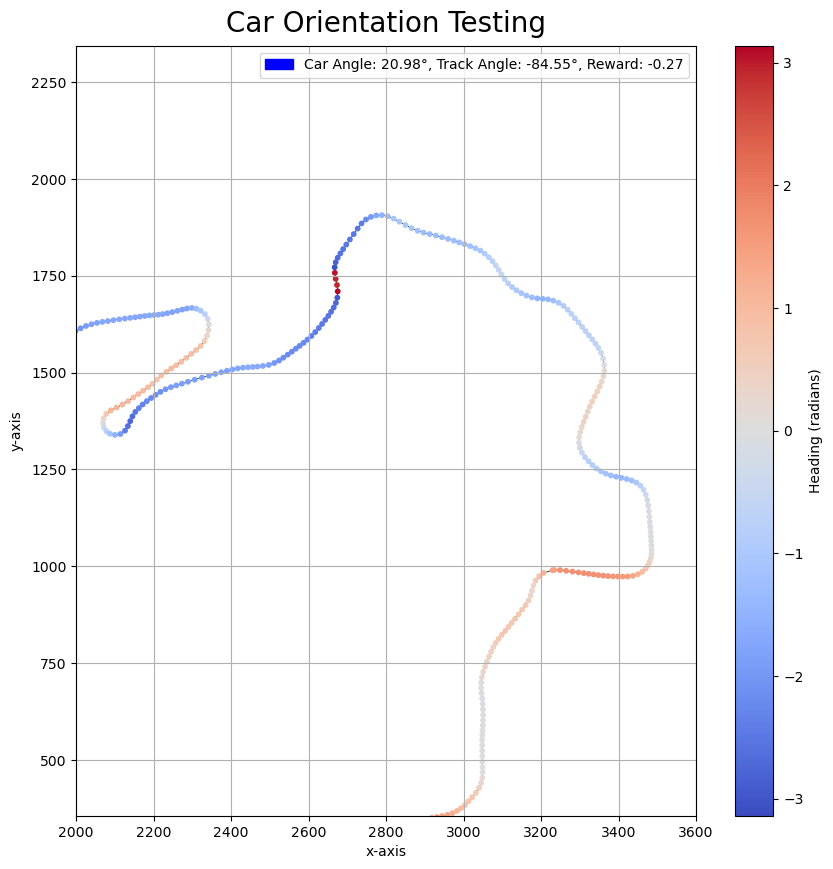

In [72]:
car_length, car_width = 15, 8
arrow_length = 20
reward = 0.0
zoom = 150

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title("Car Orientation Testing", fontsize=20, pad=10)


car_coords = (-673.22,-2186.35)
car_heading = 1.9369

point1, point2 = get_nearest_points(track_points, car_coords)

# track_direction = get_line_direction(point1, point2)
theta = get_difference_in_degrees(car_heading, point1, point2)
reward = np.round(np.cos(radians(theta)),2)

road_direction_deg = get_line_direction_degrees(point1, point2)
# rad = rad_between_lines(car_heading, point1, point2)
# reward = 1*math.cos(rad_between_lines(car_heading, point1, point2))

plt.scatter(point1[0], point1[1], c='red', zorder=10)
plt.scatter(point2[0], point2[1], c='green', zorder=10)
plt.plot([point1[0], point2[0]], [point1[1], point2[1]], c='red')

arrow_end = (car_coords[0] + arrow_length * math.cos(car_heading), car_coords[1] + arrow_length * math.sin(car_heading))
rect = patches.Rectangle((- car_length/2, - car_width/2), car_length, car_width, color='blue', label=f'Car Angle: {degrees(car_heading):.2f}°, Track Angle: {road_direction_deg:.2f}°, Reward: {reward:.2f}', zorder=3)
rot_trans = transforms.Affine2D().rotate_deg(degrees(car_heading)).translate(car_coords[0], car_coords[1])
rect.set_transform(rot_trans + ax.transData)
ax.add_patch(rect)
ax.arrow(car_coords[0], car_coords[1], arrow_end[0] - car_coords[0], arrow_end[1] - car_coords[1],
        head_width=5, head_length=10, fc='red', ec='red')

cmap = plt.colormaps["coolwarm"]
sc = ax.scatter(x_coords, y_coords, c=headings, cmap=cmap, s=10, zorder=1)
ax.plot(x_coords, y_coords, linewidth=0.5, color='black', zorder=0)
cbar = fig.colorbar(sc, label="Heading (radians)")

plt.xlabel("x-axis")
plt.ylabel("y-axis", labelpad=5)
plt.axis('equal')
plt.grid()
plt.legend()

# zoom in start/finish line
# plt.xlim(-1000, 0)
# plt.ylim(-2500, -2000)

# zoom in on carousel
# plt.xlim(1900, 2500)
# plt.ylim(1400, 1600)

# zoom in on current car location
# plt.xlim(car_coords[0]-zoom, car_coords[0]+zoom)
# plt.ylim(car_coords[1]-zoom, car_coords[1]+zoom)

plt.xlim(2000, 3600)
plt.ylim(700, 2000)

plt.show()

In [60]:
nord_df["headings"].describe()

count    12007.000000
mean        -0.044490
std          1.777641
min         -3.140627
25%         -1.741861
50%          0.112861
75%          1.128440
max          3.141112
Name: headings, dtype: float64

In [71]:
def correct_heading(heading):
    corrected_heading = heading - math.pi/2
    if corrected_heading < -math.pi:
        corrected_heading += 2*math.pi
    elif corrected_heading > math.pi:
        corrected_heading -= 2*math.pi
    return corrected_heading

In [70]:
print(math.pi)
print(-math.pi)
print()
print(degrees(math.pi))
print(degrees(-math.pi))
print()
print("------------------------")
print()
print(math.pi - math.pi/2)
print(-math.pi - math.pi/2)
print()
print(degrees(math.pi - math.pi/2))
print(degrees(-math.pi - math.pi/2))

3.141592653589793
-3.141592653589793

180.0
-180.0

------------------------

1.5707963267948966
-4.71238898038469

90.0
-270.0


***

In [238]:
print(cars[3])

In [326]:
# def get_line_direction(point1, point2):
#     delta_x = point2[0] - point1[0]
#     delta_y = point2[1] - point1[1]
#     return math.atan2(delta_y, delta_x)

def get_nearest_points(track_points, position, n=2):
    nearest_points = nsmallest(n, track_points, key=lambda track_point: math.hypot(position[0]-track_point[1], position[1]-track_point[2]))

    point1, point2 = nearest_points
    if point1[0] > point2[0]:
        next_point = point1
        prev_point = point2
    else:
        next_point = point2
        prev_point = point1

    return (prev_point[1], prev_point[2]), (next_point[1], next_point[2])

def get_track_direction(point1, point2):
    
    x1, y1 = point1
    x2, y2 = point2

    # Calculate the differences
    dx = x2 - x1
    dy = y2 - y1

    # Calculate the direction in radians
    direction = math.atan2(dy, dx)
    
    return degrees(direction)

def get_degrees_between_lines(car_heading, A, B):
    # Convert line representations to vectors
    V1 = (math.cos(car_heading), math.sin(car_heading))
    V2 = (B[0] - A[0], B[1] - A[1])

    # Calculate dot product
    dot_product = V1[0]*V2[0] + V1[1]*V2[1]

    # Calculate magnitudes
    magnitude_V1 = math.sqrt(V1[0]**2 + V1[1]**2)
    magnitude_V2 = math.sqrt(V2[0]**2 + V2[1]**2)

    # Calculate and return angle in degrees
    cos_alpha = dot_product / (magnitude_V1 * magnitude_V2)
    alpha_rad = math.acos(cos_alpha)
    # alpha_deg = alpha_rad * 180 / math.pi
    return alpha_rad

In [327]:
prev_point, next_point = get_nearest_points(track_points, car_coords)
print(prev_point)
print(next_point)

(2324.508056640625, 1487.172485351562)
(2342.514404296875, 1491.999389648438)


In [330]:
print("Right", get_track_direction((0,0),(1,0)))
print("Down right", get_track_direction((0,0),(1,-1)))
print("Down", get_track_direction((0,0),(0,-1)))
print("Left", get_track_direction((0,0),(-1,0)))
print("Up", get_track_direction((0,0),(0,1)))

Right 0.0
Down right -45.0
Down -90.0
Left 180.0
Up 90.0


In [318]:
line_direction = get_line_direction(point1, point2)
print(line_direction)

0.26190912952261547


In [310]:
rad = rad_between_lines(car_heading, point1, point2)
print(rad)

0.9917185703368366


In [323]:
degrees((7/4)*pi)

315.0

In [338]:
print(radians(90))
print(radians(180))
print(radians(270))
print(radians(315))
print(radians(360))

1.5707963267948966
3.141592653589793
4.71238898038469
5.497787143782138
6.283185307179586


In [384]:
car_heading_in_degrees = 90
point1 = (0, 0)
point2 = (-1, 0)

# usage:
car_heading_rad = radians(car_heading_in_degrees)  # car heading of 45 degrees in radians
cars_heading_in_degrees = get_difference_in_degrees(car_heading_rad, point1, point2)
reward = np.round(np.cos(radians(cars_heading_in_degrees)),2)
print(f"{car_heading_rad=}")
print(f"{cars_heading_in_degrees=}")
print(f"{reward=}")

car_heading_rad=1.5707963267948966
cars_heading_in_degrees=90.0
reward=0.0


In [356]:
nord_df["headings_deg"] = np.degrees(nord_df['headings'])

C:\Users\CHRIS\AppData\Local\Temp\ipykernel_252908\1597636020.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nord_df["headings_deg"] = np.degrees(nord_df['headings'])


In [361]:
nord_df["headings_deg"].describe()

count    12007.000000
mean        -2.549068
std        101.851306
min       -179.944667
25%        -99.801290
50%          6.466484
75%         64.654840
max        179.972438
Name: headings_deg, dtype: float64

In [363]:
nord_df.head()

,x_coords,y_coords,headings,normalizedCarPositions,headings_deg
0,-517.279968,-2350.988770,2.212538,0.000044,126.769062
1,-518.695984,-2349.923828,2.216559,0.000130,126.999472
2,-520.073364,-2348.879150,2.220555,0.000213,127.228406
3,-521.451172,-2347.821289,2.227915,0.000297,127.650102
4,-522.865173,-2346.711426,2.239854,0.000391,128.334187


In [397]:
df = pd.DataFrame(track_points, columns=['order', 'x_coords', 'y_coords'])
df.head()

,order,x_coords,y_coords
0,0,-517.279968,-2350.988770
1,1,-528.484741,-2342.195068
2,2,-539.864075,-2332.786865
3,3,-551.452087,-2322.964111
4,4,-563.127686,-2312.380615


In [398]:
# Write DataFrame to Parquet
df.to_parquet('track_points.parquet', engine = 'pyarrow', compression = 'gzip')